# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

## Answer Ex 2.1.1:

A random forest is a group of trees, which each 'vote' for a classification of an observation. The classification with the highest votes is the determined classification. 

1. n_estimators is the number of trees the model will have, n=1 will result in a decision tree
    
Too few trees, coupled with imprecise tree classification can lead imprecise voting outcome since each tree has high voting power. Too many trees migh lead to unecessary overuse of computing power and overfitting.
    
2. max_depth is limiting the max number of questions an observation can to go through (depth of tree) 
  - i.e. the longest path from root to a leaf
  
Too shallow a tree will lead to more frequent missclassification in each tree, whereas too deep trees will lead to overfitting. Overfitting means the model will become too good at predicting the training dataset, which leads to a worse actual predicting performance on new datasets. This can be tested by testing the models prediction power on a test data, not used for training.
        
3. max_features - the maximum number of features the model is allowed to include in each split

A low number of features means each node will be more simple, hence a deeper tree would be required to make a feasible prediction. A too high number of features in each node could again lead to overfitting. 
        
4. bootstrap, if the sample is bootstrapped or not

I set to false, the whole dataset is used in each tree.
   

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

## Answer Ex 2.1.2:

- Set max features to 1 (trees select best predicting feature)
- set bootstraping to False -> all trees use same data (whole dataset)

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine


# Get wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

# Get digits data
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']




- We define a function, which applies all 4 dimension reductions methods and plots them 
- In case of PCA and LDA the 2 components with the highest explanation value are plotted
- We add an optional boolean variable called "standard" to perform PCA and LDA with or without standardization



In [2]:
def dim_red(X,y,standard=True):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.manifold import TSNE
    import umap
    import matplotlib.pylab as plt
    sc = StandardScaler()
    pca = PCA()
    lda = LinearDiscriminantAnalysis()
    
    # Standardizing the dataset - i.e. transform so that mean=0, std.dev.=1
    if standard:
        X_std = sc.fit_transform(X)
    else:
        X_std = X
    fig,ax = plt.subplots(2,2)
    
    #PCA
    Z = pca.fit_transform(X_std)
    ax[0,0].scatter(Z[:,0],Z[:,1], c=y)
    ax[0,0].set_title('PCA')
    #LDA
    X_lda = lda.fit_transform(X_std,y)
    ax[0,1].scatter(X_lda[:,0],X_lda[:,1],c=y)
    ax[0,1].set_title('LDA')
    
    #t-SNE
    X_embedded = TSNE(n_components=2).fit_transform(X_std)
    ax[1,0].scatter(X_embedded[:,0],X_embedded[:,1],c=y)
    ax[1,0].set_title('t-SNE')
    
    #UMAP
    reducer = umap.UMAP()
    X_embedded_umap = reducer.fit_transform(X_std)
    ax[1,1].scatter(X_embedded_umap[:,0],X_embedded_umap[:,1],c=y)
    ax[1,1].set_title('UMAP')

    #PLots figure with size 12 in
    fig.set_size_inches(12,12)


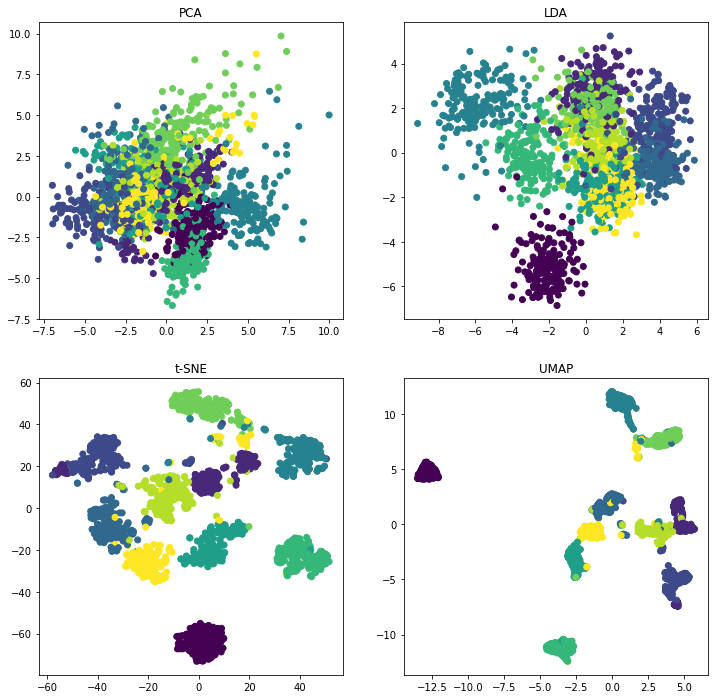

In [3]:
dim_red(X_digits,y_digits,standard=True)

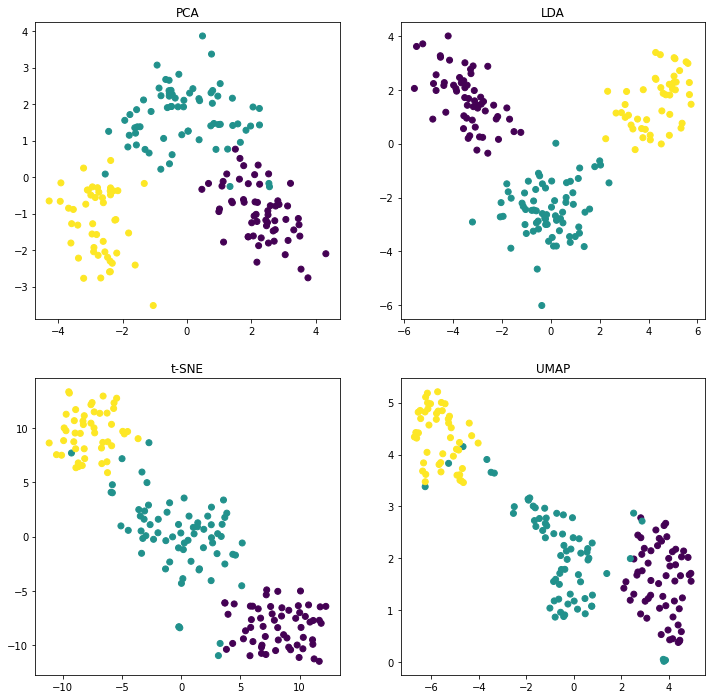

In [4]:
dim_red(X_wine,y_wine,standard=True)

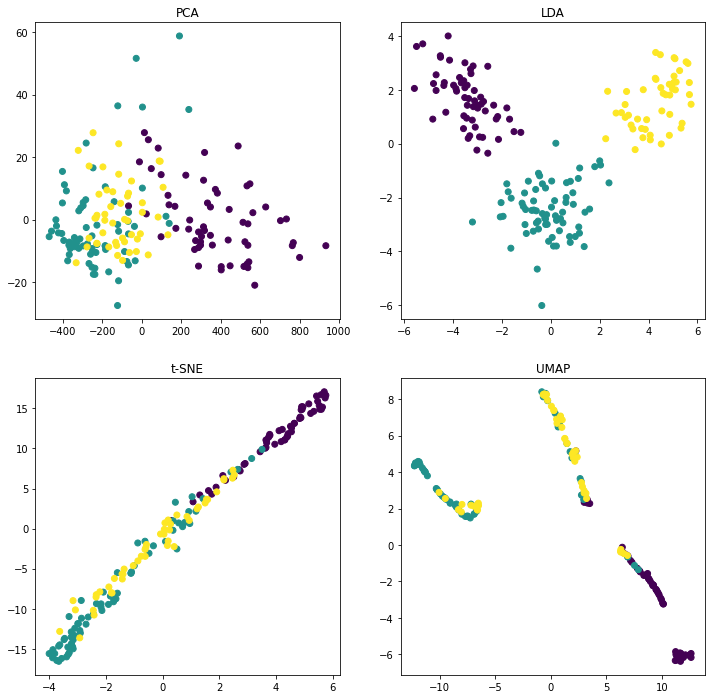

In [5]:
dim_red(X_wine,y_wine,standard=False)

- As can be seen above there is a significant difference in the clustering of t-SNE and UMAP depending on the Wine data beeing standardized or not.
- The un-standardized dataset fares a lot worse, with a greater overlap of the clusters.
- This the reason for this might be a great difference in variance of the features.

Text(0, 0.5, 'Standard deviation')

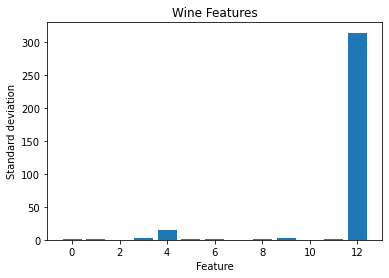

In [6]:
plt.bar(range(13),np.std(X_wine, axis=0))
plt.title('Wine Features')
plt.xlabel('Feature')
plt.ylabel('Standard deviation')


- As can be seen above feature 12 has a far greater variance than all the other Features, which leads to a comparatively higher covariance as well.
- This is what "squishes" the datapoints together, since all other variance dissappears, i.e. teh explanation value of the other features are lost.
- this problem is not that prevalent among the digits dataset

Text(0, 0.5, 'Standard deviation')

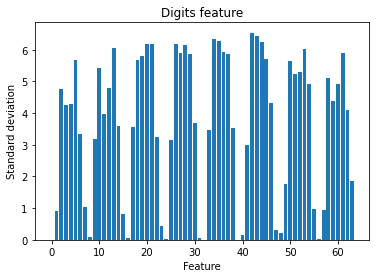

In [7]:
plt.bar(range(64),np.std(X_digits, axis=0))
plt.title('Digits feature')
plt.xlabel('Feature')
plt.ylabel('Standard deviation')

- It is also worth mentioning that the Wine dataset has far less observations (178 compared to 1797), which gives the algorythm less to work with.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

## Answer Ex.4.2.1

A problem with estimating treatment effects in a heteroenious setting is that you will always only observe an instance treated or untreated, but never both. This is posing a challenge when doing inference and can lead to e.g. biased estimators.

- Implementing honest trees, the dataset is split into two groups, wheresas the first group is used to estimate the partitions of the dataset, and the second group is used for the actual estimation. 
- In an adaptive CT, these two steps are done with the same dataset. 
- Doing these two steps on two different datasets make them independent from each other, whereas doing both steps on the same dataset gives the model tendency to choose the partitions, which might decrease the MSE, making the trees "disonest". 
- This makes the MSE estimates biased. Using the honest tree model, solves this problem, giving unbiased MSE estimates.
- And when estimating there is a greater emphasis on estimating the treatment effect rather than the treatment outcome




